In [11]:
# Manipulation
import pandas as pd
import numpy as np

# Vizualisation
from IPython.display import display
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import MDS

In [12]:
# Load data
data = pd.read_csv("data/100kH_5or6P.csv", encoding = "latin-1")
display(data.head())

,Player Name,Site,Hands,Net Won,VP$IP,PFR,3Bet,Postflop Agg%,W$WSF%,WTSD%,...,Raise River CBet,Squeeze,Raise Two Raisers,Call Two Raisers,vs 3Bet Fold,vs 3Bet Call,vs 3Bet Raise,vs 4Bet Fold,vs 4Bet Call,vs 4Bet Raise
0,Avatard789,2,593103,38168.800,0.273,0.206,0.092,0.329,0.466,0.297,...,0.082,0.094,0.042,0.037,0.475,0.383,0.144,0.380,0.345,0.275
1,lefromage35,2,474845,4139.340,0.283,0.210,0.083,0.277,0.405,0.279,...,0.116,0.056,0.029,0.022,0.604,0.251,0.147,0.608,0.143,0.249
2,tib0rk0vaX,2,374269,-2267.580,0.241,0.198,0.077,0.382,0.464,0.266,...,0.089,0.078,0.039,0.012,0.602,0.265,0.134,0.492,0.259,0.249
3,Etisetna,2,326879,11510.310,0.229,0.186,0.080,0.331,0.444,0.265,...,0.094,0.085,0.026,0.018,0.572,0.296,0.134,0.415,0.339,0.245
4,xxTof59xx,2,281848,9216.200,0.229,0.181,0.074,0.360,0.474,0.277,...,0.099,0.069,0.037,0.003,0.565,0.317,0.119,0.466,0.272,0.261


In [13]:
display(data.drop(["Site", "Net Won"], axis = 1))

,Player Name,Hands,VP$IP,PFR,3Bet,Postflop Agg%,W$WSF%,WTSD%,Won $ at SD,Flop CBet%,...,Raise River CBet,Squeeze,Raise Two Raisers,Call Two Raisers,vs 3Bet Fold,vs 3Bet Call,vs 3Bet Raise,vs 4Bet Fold,vs 4Bet Call,vs 4Bet Raise
0,Avatard789,593103,0.273,0.206,0.092,0.329,0.466,0.297,0.480,0.591,...,0.082,0.094,0.042,0.037,0.475,0.383,0.144,0.380,0.345,0.275
1,lefromage35,474845,0.283,0.210,0.083,0.277,0.405,0.279,0.526,0.493,...,0.116,0.056,0.029,0.022,0.604,0.251,0.147,0.608,0.143,0.249
2,tib0rk0vaX,374269,0.241,0.198,0.077,0.382,0.464,0.266,0.499,0.687,...,0.089,0.078,0.039,0.012,0.602,0.265,0.134,0.492,0.259,0.249
3,Etisetna,326879,0.229,0.186,0.080,0.331,0.444,0.265,0.541,0.649,...,0.094,0.085,0.026,0.018,0.572,0.296,0.134,0.415,0.339,0.245
4,xxTof59xx,281848,0.229,0.181,0.074,0.360,0.474,0.277,0.520,0.703,...,0.099,0.069,0.037,0.003,0.565,0.317,0.119,0.466,0.272,0.261
5,JVEUXtaBOITE,263533,0.213,0.161,0.046,0.322,0.441,0.258,0.535,0.594,...,0.093,0.052,0.023,0.020,0.644,0.247,0.110,0.466,0.284,0.250
6,Heinrich_le,257253,0.290,0.236,0.115,0.366,0.456,0.269,0.500,0.612,...,0.093,0.106,0.050,0.023,0.541,0.314,0.147,0.422,0.291,0.287
7,justEdge1,256825,0.221,0.185,0.110,0.435,0.539,0.283,0.504,0.718,...,0.061,0.086,0.026,0.017,0.535,0.309,0.157,0.489,0.252,0.259
8,Lando4man,252942,0.220,0.178,0.101,0.426,0.538,0.273,0.485,0.720,...,0.073,0.090,0.024,0.016,0.508,0.336,0.158,0.456,0.256,0.288
9,Cha444_Fr,250127,0.250,0.196,0.109,0.336,0.456,0.284,0.508,0.580,...,0.143,0.107,0.042,0.036,0.415,0.432,0.156,0.506,0.284,0.210


In [14]:
# Remove problematic row (name of player "Gimme$$4Beer")
data.drop([33], axis = 0, inplace = True)

In [15]:
# Remove unnecessary columns
y = data.iloc[:, 0]
X = data.drop(["Player Name", "Site", "Net Won", "Hands"], axis = 1)

In [16]:
# Standardize features
stdSc = StandardScaler()
Xstd = pd.DataFrame(data = stdSc.fit_transform(X), columns = X.columns)
display(Xstd.head())

,VP$IP,PFR,3Bet,Postflop Agg%,W$WSF%,WTSD%,Won $ at SD,Flop CBet%,Turn CBet%,River CBet%,...,Raise River CBet,Squeeze,Raise Two Raisers,Call Two Raisers,vs 3Bet Fold,vs 3Bet Call,vs 3Bet Raise,vs 4Bet Fold,vs 4Bet Call,vs 4Bet Raise
0,1.361,0.781,0.408,-0.941,-0.159,1.174,-1.301,-0.947,0.611,-0.568,...,-0.713,1.044,0.538,2.594,-1.661,1.668,0.203,-1.522,1.389,0.403
1,1.722,0.981,-0.057,-2.264,-2.282,0.393,0.616,-2.234,-0.307,0.900,...,0.373,-1.018,-0.678,0.679,0.561,-0.716,0.338,1.925,-1.965,-0.207
2,0.167,0.446,-0.362,0.387,-0.234,-0.158,-0.496,0.307,1.373,-0.839,...,-0.485,0.197,0.208,-0.535,0.526,-0.459,-0.229,0.173,-0.039,-0.220
3,-0.280,-0.079,-0.185,-0.908,-0.926,-0.194,1.252,-0.190,-1.856,-0.448,...,-0.345,0.560,-0.936,0.171,0.005,0.104,-0.259,-0.988,1.291,-0.307
4,-0.261,-0.257,-0.489,-0.167,0.126,0.313,0.366,0.528,1.198,-0.308,...,-0.162,-0.309,0.054,-1.573,-0.112,0.474,-0.912,-0.218,0.182,0.083


In [17]:
# Compute distance matrix between each pair of rows
dist = euclidean_distances(Xstd, Xstd)
distDF = pd.DataFrame(data = np.round(dist, 2), index = y, columns = y)
display(distDF)

Player Name,Avatard789,lefromage35,tib0rk0vaX,Etisetna,xxTof59xx,JVEUXtaBOITE,Heinrich_le,justEdge1,Lando4man,Cha444_Fr,...,Taré_GOGOL!!,deglingue,Brak is back,BluffKilla38,Jiibi,QuelDommage,gildor4444,JÜRGEN1954,tellmeWAI,bonjambon
Player Name,,,,,,,,,,,,,,,,,,,,,
Avatard789,0.000,8.160,6.180,6.370,6.770,8.220,4.790,6.910,6.600,4.960,...,6.440,6.910,7.800,6.670,6.570,6.830,12.400,8.350,8.100,5.340
lefromage35,8.160,0.000,6.560,6.630,6.900,6.720,6.990,9.520,9.930,7.640,...,7.180,9.080,6.620,6.450,6.360,7.000,12.300,8.680,6.560,9.990
tib0rk0vaX,6.180,6.560,0.000,5.190,3.010,4.940,5.170,5.620,6.030,7.310,...,4.180,6.330,4.330,4.270,3.940,5.790,11.430,5.580,3.190,6.740
Etisetna,6.370,6.630,5.190,0.000,5.020,4.990,5.880,7.600,7.580,6.670,...,4.870,8.090,6.850,4.800,5.400,5.670,11.350,8.240,6.350,8.260
xxTof59xx,6.770,6.900,3.010,5.020,0.000,5.130,6.170,5.700,6.030,7.280,...,4.690,7.330,4.800,3.500,3.970,4.370,11.210,6.930,4.770,7.130
JVEUXtaBOITE,8.220,6.720,4.940,4.990,5.130,0.000,8.070,8.400,8.670,8.870,...,6.210,9.800,7.120,5.890,6.400,7.220,12.580,9.630,5.130,10.410
Heinrich_le,4.790,6.990,5.170,5.880,6.170,8.070,0.000,7.630,7.780,5.750,...,5.410,6.470,5.460,6.170,5.650,6.380,12.760,6.430,6.850,5.460
justEdge1,6.910,9.520,5.620,7.600,5.700,8.400,7.630,0.000,2.010,7.760,...,6.830,6.090,6.660,5.890,5.660,7.330,9.950,5.860,6.710,6.760
Lando4man,6.600,9.930,6.030,7.580,6.030,8.670,7.780,2.010,0.000,7.630,...,6.750,6.200,7.250,5.880,5.770,7.120,10.330,6.420,7.090,6.530


In [18]:
display(np.mean(dist))

6.7675413915377192

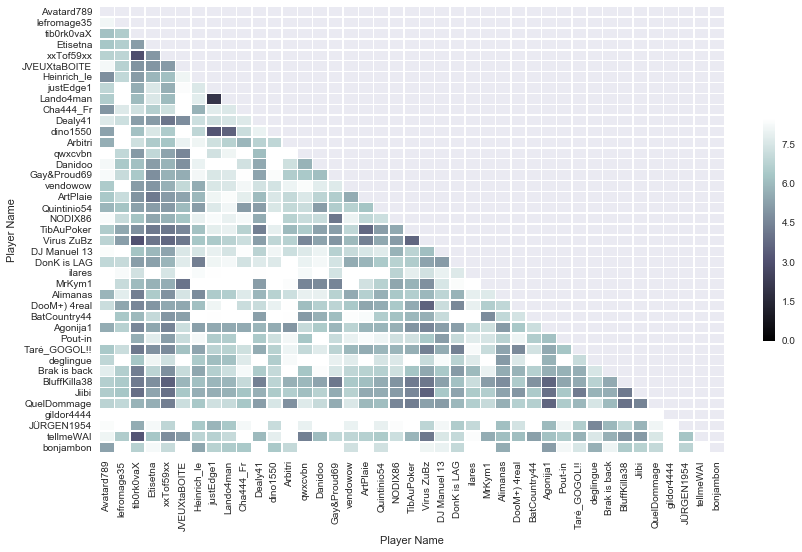

In [8]:
# Plot a pretty distance matrix
mask = np.zeros_like(distDF, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (14, 8))
sns.heatmap(distDF, 
            mask = mask, 
            cmap = "bone", 
            linewidths = .5, 
            vmax = 8.5,
            cbar_kws = {"shrink": .5})

Only plot distance < 3


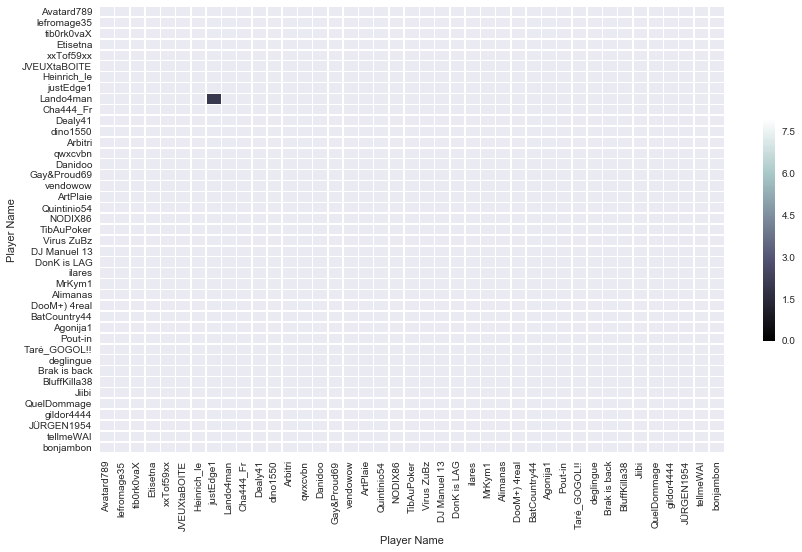

In [20]:
# Only plot distance < 3
print("Only plot distance < 3")
mask = dist > 3
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (14, 8))
sns.heatmap(distDF, 
            mask = mask, 
            cmap = "bone", 
            linewidths = .5, 
            vmax = 8,
            cbar_kws = {"shrink": .5})

In [22]:
display(distDF["justEdge1"].sort_values().head(11))
display(distDF["xxTof59xx"].sort_values().head(11))

Player Name
justEdge1      0.000
Lando4man      2.010
dino1550       3.180
Agonija1       5.520
tib0rk0vaX     5.620
Jiibi          5.660
xxTof59xx      5.700
JÜRGEN1954     5.860
BluffKilla38   5.890
deglingue      6.090
Virus ZuBz     6.460
Name: justEdge1, dtype: float64

Player Name
xxTof59xx      0.000
tib0rk0vaX     3.010
BluffKilla38   3.500
Virus ZuBz     3.700
Jiibi          3.970
Dealy41        4.110
TibAuPoker     4.180
QuelDommage    4.370
Agonija1       4.500
Taré_GOGOL!!   4.690
tellmeWAI      4.770
Name: xxTof59xx, dtype: float64